In [2]:
print('Pytorch没有官方高阶API,一般用户自己实现训练循环,验证循环和预测循环')

Pytorch没有官方高阶API,一般用户自己实现训练循环,验证循环和预测循环


In [3]:
import datetime
#from torchkeras import Model, summary
def printbar():
    nowtime = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    print("\n"+"=========="*8 + "%s"%nowtime)
printbar()


================================================================================2022-04-28 08:44:52


### 1. 线性回归模型

#### 1.1 准备数据

In [4]:
import torch
from torch import nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, TensorDataset

In [5]:
# 样本数量
n = 400
# 生成测试用的数据集
x = 10 * torch.rand([n, 2]) - 5.0 # (400, 2)
w0 = torch.tensor([[2.0], [-3.0]]) # (2, 1)
b0 = torch.tensor([10.0])
y = x @ w0 + b0 + torch.normal(0.0, 2.0, size = [n ,1]) # @是矩阵乘法，后面加的是干扰项
print('y的行列数为:', y.shape)

y的行列数为: torch.Size([400, 1])


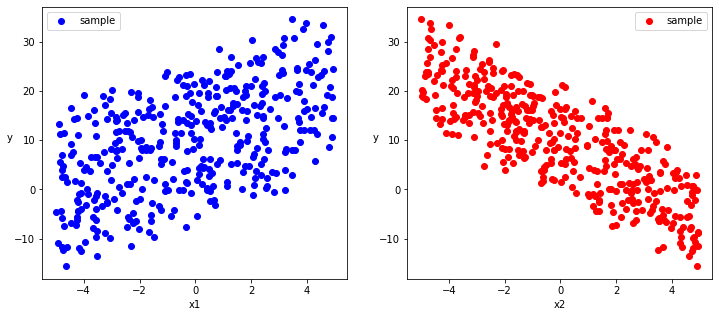

In [6]:
# 数据可视化
#%matplotlib inline
#%config InlineBackend.figure_format = 'svg'
plt.figure(figsize = (12, 5))
ax1 = plt.subplot(121)
ax1.scatter(x[:, 0], y[:, 0], c = 'b', label = 'sample')
ax1.legend()
plt.xlabel('x1')
# rotation = 0是根据y的反转，若是默认的话，y会反转
plt.ylabel('y', rotation = 0)

ax2 = plt.subplot(122)
ax2.scatter(x[:, 1], y[:, 0], c = 'r', label = 'sample')
ax2.legend()
plt.xlabel('x2')
plt.ylabel('y', rotation = 0)

plt.show()

In [7]:
# 构造输入数据管道
ds = TensorDataset(x, y)

In [8]:
for f, l in ds:
    print('f的值为:{}, 所对应的值为:{}'.format(f, l))

f的值为:tensor([-3.9195, -0.5814]), 所对应的值为:tensor([4.5197])
f的值为:tensor([-4.0952, -0.6852]), 所对应的值为:tensor([1.3492])
f的值为:tensor([-1.9612, -2.0891]), 所对应的值为:tensor([8.3892])
f的值为:tensor([-1.2523, -2.1232]), 所对应的值为:tensor([15.2358])
f的值为:tensor([4.2102, 0.0575]), 所对应的值为:tensor([21.1746])
f的值为:tensor([ 0.5037, -4.5268]), 所对应的值为:tensor([22.0271])
f的值为:tensor([-1.5766,  0.5077]), 所对应的值为:tensor([8.4595])
f的值为:tensor([1.9281, 2.8615]), 所对应的值为:tensor([4.8441])
f的值为:tensor([3.8943, 1.1445]), 所对应的值为:tensor([18.0429])
f的值为:tensor([-3.8361,  0.9943]), 所对应的值为:tensor([-0.9592])
f的值为:tensor([2.8173, 4.7173]), 所对应的值为:tensor([-0.6374])
f的值为:tensor([-4.6909,  1.8449]), 所对应的值为:tensor([-7.4667])
f的值为:tensor([0.5067, 2.0492]), 所对应的值为:tensor([6.1318])
f的值为:tensor([-3.6808,  3.9654]), 所对应的值为:tensor([-7.8094])
f的值为:tensor([0.1333, 1.0442]), 所对应的值为:tensor([4.2683])
f的值为:tensor([ 1.7024, -1.9685]), 所对应的值为:tensor([18.8129])
f的值为:tensor([ 1.0541, -3.4373]), 所对应的值为:tensor([23.1273])
f的值为:tensor([4.3584, 3.0837]), 所对

In [9]:
ds_train, ds_valid = torch.utils.data.random_split(ds, [int(400 * 0.7), 400 - int(400 * 0.7)])

In [10]:
dl_train = DataLoader(ds_train, batch_size = 10, shuffle = True, num_workers = 2)
dl_valid = DataLoader(ds_valid, batch_size = 10, num_workers = 2)

#### 1.2 定义模型

In [11]:
# 继承用户自定义的模型
from torchkeras import Model

In [12]:
class LinearRegression(Model):
    
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.fc = nn.Linear(2, 1)

    # 正向传播
    def forward(self, x):
        return self.fc(x)
model = LinearRegression()

In [14]:
model.summary(input_shape = (2, ))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 1]               3
Total params: 3
Trainable params: 3
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.000008
Forward/backward pass size (MB): 0.000008
Params size (MB): 0.000011
Estimated Total Size (MB): 0.000027
----------------------------------------------------------------


#### 1.3 训练模型

In [17]:
### 利用fit训练
def mean_absolute_error(y_pred, y_true):
    return torch.mean(torch.abs(y_pred - y_true))

def mean_absolute_percent_error(y_pred, y_true):
    mean_percent__error = (torch.abs(y_pred - y_true) + 1e-7) / (torch.abs(y_true) + 1e-7)
    return torch.mean(mean_percent__error)

model.compile(  loss_func = nn.MSELoss(), 
                optimizer = torch.optim.Adam(model.parameters(), lr = 0.01), 
                metrics_dict = {'mae': mean_absolute_error, 'mape': mean_absolute_percent_error}        
            )
dhistory = model.fit(200, dl_train = dl_train, dl_val = dl_valid, log_step_freq = 20)

Start Training ...

================================================================================2022-04-28 09:09:15
{'step': 20, 'loss': 230.224, 'mae': 12.521, 'mape': 1.937}

 +-------+---------+--------+-------+----------+---------+----------+
| epoch |   loss  |  mae   |  mape | val_loss | val_mae | val_mape |
+-------+---------+--------+-------+----------+---------+----------+
|   1   | 224.222 | 12.439 | 1.744 | 178.268  |  11.071 |  1.309   |
+-------+---------+--------+-------+----------+---------+----------+

================================================================================2022-04-28 09:09:18
{'step': 20, 'loss': 211.359, 'mae': 12.14, 'mape': 1.529}

 +-------+---------+--------+-------+----------+---------+----------+
| epoch |   loss  |  mae   |  mape | val_loss | val_mae | val_mape |
+-------+---------+--------+-------+----------+---------+----------+
|   2   | 199.494 | 11.751 | 1.382 | 159.044  |  10.502 |  1.317   |
+-------+---------+--------+-------

In [18]:
# 结果可视化
w, b = model.state_dict()['fc.weight'], model.state_dict()['fc.bias']

In [19]:
w

tensor([[ 1.9820, -2.9984]])

In [20]:
b

tensor([10.1284])

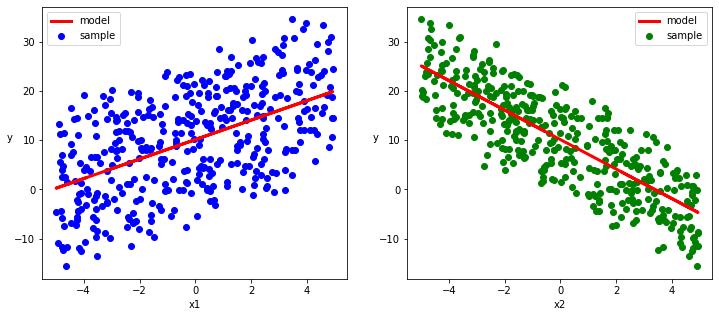

In [25]:
plt.figure(figsize = (12, 5))

ax1 = plt.subplot(121)
ax1.scatter(x[:, 0], y[:, 0], c = 'b', label = 'sample')
ax1.plot(x[:, 0], w[0,0] * x[:, 0] + b[0], '-r', linewidth = 3.0, label = 'model')
ax1.legend()
plt.xlabel('x1')
plt.ylabel('y', rotation = 0)

ax2 = plt.subplot(122)
ax2.scatter(x[:, 1], y[:, 0], c= 'g', label = 'sample')
ax2.plot(x[:, 1], w[0,1] * x[:, 1] + b[0], '-r', linewidth = 3.0, label = 'model')
ax2.legend()
plt.xlabel('x2')
plt.ylabel('y', rotation = 0)
plt.show()

#### 1.4 评估模型

In [27]:
dhistory.tail()

,loss,mae,mape,val_loss,val_mae,val_mape
195,3.837675,1.566040,1.776814,3.229779,1.409174,0.587698
196,3.836985,1.566376,1.786100,3.244737,1.413768,0.584586
197,3.814360,1.562569,1.734330,3.242103,1.412724,0.577367
198,3.817892,1.562046,1.738607,3.246971,1.415078,0.572170
199,3.824597,1.564210,1.767724,3.253508,1.415194,0.566712


In [34]:
def plot_metric(dhistory, metric):
    train_metrics = dhistory[metric]
    val_metrics = dhistory['val_' + metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation' + metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend(['train_' + metric, 'val_' + metric])
    plt.show()

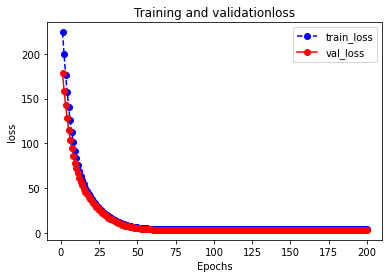

In [35]:
plot_metric(dhistory = dhistory, metric = 'loss')

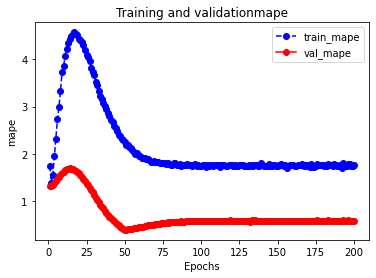

In [36]:
plot_metric(dhistory = dhistory, metric = 'mape')

In [37]:
## 评估
model.evaluate(dl_valid)

{'val_loss': 3.253508339325587,
 'val_mae': 1.4151942779620488,
 'val_mape': 0.5667121323446432}

#### 1.5 使用模型

In [39]:
dl = DataLoader(TensorDataset(x))
model.predict(dl)[0:10]

tensor([[ 4.1033],
        [ 4.0662],
        [12.5052],
        [14.0125],
        [18.3005],
        [24.7001],
        [ 5.4812],
        [ 5.3699],
        [14.4152],
        [-0.4563]])

In [40]:
model.predict(dl_valid)[0:10]

tensor([[ 1.9664],
        [ 1.3029],
        [19.0714],
        [12.2151],
        [ 1.9780],
        [10.2641],
        [16.7164],
        [17.5272],
        [21.8954],
        [19.0725]])

### 2. DNN二分类模型

#### 2.1 准备数据

In [56]:
import numpy as np
import pandas as pd
import torch
from torch import nn
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [44]:
# 正，负样本数量
print('正，负样本数量')
n_positive, n_negative = 2000, 2000

正，负样本数量


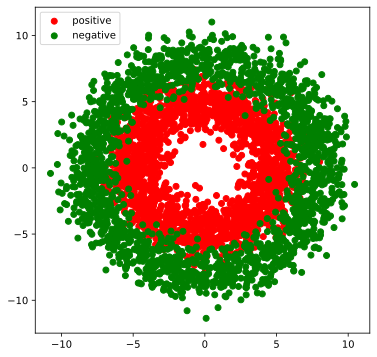

In [45]:
# 生成正样本，小圆环分布
r_p = 5.0 + torch.normal(0.0, 1.0, size = [n_positive, 1])
theta_p = 2 * np.pi * torch.rand([n_positive, 1])
xp = torch.cat([r_p * torch.cos(theta_p), r_p * torch.sin(theta_p)], axis = 1)
yp = torch.ones_like(r_p)


# 生成负样本，大圆环分布
r_n = 8.0 + torch.normal(0.0, 1.0, size = [n_negative, 1])
theta_n = 2 * np.pi * torch.rand([n_negative, 1])
xn = torch.cat([r_n * torch.cos(theta_n), r_n * torch.sin(theta_n)], axis = 1)
yn = torch.zeros_like(r_n)

# 汇总样本
x = torch.cat([xp, xn], axis = 0)
y = torch.cat([yp, yn], axis = 0)

# 可视化
plt.figure(figsize = (6, 6))
plt.scatter(xp[:, 0].numpy(), xp[:, 1].numpy(), c= 'r')
plt.scatter(xn[:, 0].numpy(), xn[:, 1].numpy(), c = 'g')
plt.legend(['positive', 'negative'])

In [46]:
ds = TensorDataset(x, y)

In [47]:
for f, l in ds:
    print('f的值为:{},多对应的l的值为:{}'.format(f, l))

f的值为:tensor([2.8049, 3.5017]),多对应的l的值为:tensor([1.])
f的值为:tensor([-4.3728,  2.4253]),多对应的l的值为:tensor([1.])
f的值为:tensor([ 0.3356, -4.9687]),多对应的l的值为:tensor([1.])
f的值为:tensor([-2.4523,  4.7189]),多对应的l的值为:tensor([1.])
f的值为:tensor([ 4.8445, -1.7259]),多对应的l的值为:tensor([1.])
f的值为:tensor([3.2927, 4.4489]),多对应的l的值为:tensor([1.])
f的值为:tensor([-0.0736,  6.7951]),多对应的l的值为:tensor([1.])
f的值为:tensor([-4.4842, -5.3069]),多对应的l的值为:tensor([1.])
f的值为:tensor([-4.1954,  1.4309]),多对应的l的值为:tensor([1.])
f的值为:tensor([-4.6434, -3.9589]),多对应的l的值为:tensor([1.])
f的值为:tensor([5.4425, 0.3288]),多对应的l的值为:tensor([1.])
f的值为:tensor([ 4.1038, -2.1401]),多对应的l的值为:tensor([1.])
f的值为:tensor([-2.5500,  4.2536]),多对应的l的值为:tensor([1.])
f的值为:tensor([3.8726, 3.5551]),多对应的l的值为:tensor([1.])
f的值为:tensor([-2.3174,  4.4052]),多对应的l的值为:tensor([1.])
f的值为:tensor([1.9103, 4.0095]),多对应的l的值为:tensor([1.])
f的值为:tensor([3.7287, 3.4291]),多对应的l的值为:tensor([1.])
f的值为:tensor([0.4492, 4.0659]),多对应的l的值为:tensor([1.])
f的值为:tensor([3.1857, 2.6848]),多对应的l的值为:ten

In [48]:
ds_train, ds_valid = torch.utils.data.random_split(ds, [int(len(ds) * 0.7), len(ds) - int(len(ds) * 0.7)])
dl_train = DataLoader(ds_train, batch_size = 100, shuffle = True, num_workers = 2)
dl_valid = DataLoader(ds_valid, batch_size = 100, num_workers = 2)

In [49]:
for f, l in enumerate(dl_train, 1):
    print('序号为:{},所对应的值为:{}'.format(f, l))

序号为:1,所对应的值为:[tensor([[ -1.6101,   7.6176],
        [  6.1893,   5.8143],
        [  4.3526,   0.4222],
        [ -6.0447,   6.4138],
        [ -6.4098,   5.2634],
        [ -0.6356,  -7.9165],
        [  3.0060,  -5.2760],
        [ -4.2561,   0.1380],
        [ -0.2496,   5.5133],
        [ -2.4314,   7.6005],
        [  5.3714,   5.4997],
        [ -4.1782,  -2.4095],
        [ -2.5748,  -7.2684],
        [  2.7281,   5.2127],
        [ -1.5433,   3.3139],
        [  2.1052,   5.4539],
        [ -5.9200,   2.4713],
        [  3.5263,   2.9809],
        [  1.3431,  -6.1697],
        [ -6.0538,  -1.1927],
        [  0.0963,   7.5710],
        [  3.0517,   5.8675],
        [  2.9606,  -4.5369],
        [  3.8648,   2.4861],
        [  5.6591,   2.4059],
        [  4.8984,   5.7015],
        [  5.0971,  -0.6283],
        [  2.8543,  -9.0135],
        [  0.2355,  -3.6277],
        [ -1.7937,   7.8793],
        [ -7.7409,   6.5393],
        [ -4.1495,  -8.0347],
        [  4.7608,  -6.509

#### 2.2 定义模型

In [51]:
class Net(Model):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 4)
        self.fc2 = nn.Linear(4, 8)
        self.fc3 = nn.Linear(8, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        y = nn.Sigmoid()(self.fc3(x))
        return y

In [52]:
from torchkeras import Model

In [53]:
model = Model(Net())

In [54]:
model.summary(input_shape = (2, ))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 4]              12
            Linear-2                    [-1, 8]              40
            Linear-3                    [-1, 1]               9
Total params: 61
Trainable params: 61
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.000008
Forward/backward pass size (MB): 0.000099
Params size (MB): 0.000233
Estimated Total Size (MB): 0.000340
----------------------------------------------------------------


#### 2.3 训练模型

In [58]:
## 准确率
def accuracy(y_pred, y_true):
    y_pred = torch.where(y_pred > 0.5,torch.ones_like(y_pred, dtype = torch.float32), torch.zeros_like(y_pred, dtype = torch.float32))
    acc = torch.mean(1 - torch.abs(y_pred - y_true))
    return acc


In [59]:
model.compile(loss_func = nn.BCELoss(), optimizer = torch.optim.Adam(model.parameters(), lr = 0.01), metrics_dict = {'accuracy': accuracy})
dhistory = model.fit(100, dl_train = dl_train, dl_val = dl_valid, log_step_freq = 10)

Start Training ...

================================================================================2022-04-28 10:29:09
{'step': 10, 'loss': 0.673, 'accuracy': 0.495}
{'step': 20, 'loss': 0.662, 'accuracy': 0.498}

 +-------+-------+----------+----------+--------------+
| epoch |  loss | accuracy | val_loss | val_accuracy |
+-------+-------+----------+----------+--------------+
|   1   | 0.652 |  0.524   |  0.606   |    0.677     |
+-------+-------+----------+----------+--------------+

================================================================================2022-04-28 10:29:13
{'step': 10, 'loss': 0.589, 'accuracy': 0.684}
{'step': 20, 'loss': 0.563, 'accuracy': 0.734}

 +-------+-------+----------+----------+--------------+
| epoch |  loss | accuracy | val_loss | val_accuracy |
+-------+-------+----------+----------+--------------+
|   2   | 0.538 |   0.77   |   0.44   |    0.868     |
+-------+-------+----------+----------+--------------+

====================================

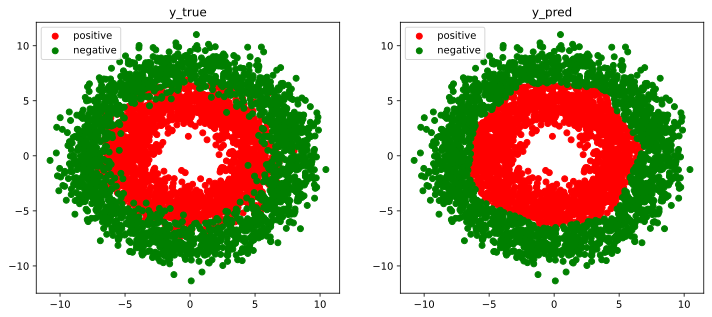

In [60]:
# 可视化
# 结果可视化
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))
ax1.scatter(xp[:, 0], xp[:, 1], c = 'r')
ax1.scatter(xn[:, 0], xn[:, 1], c = 'g')
ax1.legend(['positive', 'negative']);
ax1.set_title('y_true');

xP_pred = x[torch.squeeze(model.forward(x) >= 0.5)]
xn_pred = x[torch.squeeze(model.forward(x) < 0.5)]

ax2.scatter(xP_pred[:, 0], xP_pred[:, 1], c = 'r')
ax2.scatter(xn_pred[:, 0], xn_pred[:, 1], c = 'g')
ax2.legend(['positive', 'negative']);
ax2.set_title('y_pred');

In [61]:
dhistory.tail()

,loss,accuracy,val_loss,val_accuracy
95,0.175746,0.925000,0.175720,0.926667
96,0.180363,0.923571,0.164991,0.936667
97,0.174551,0.926429,0.174394,0.935000
98,0.178795,0.927857,0.171879,0.932500
99,0.176388,0.926071,0.164539,0.939167


In [62]:
# 模型评估
def plot_metric(dhistory, metric):
    train_metrics = dhistory[metric]
    val_metrics = dhistory['val_' + metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation' + metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend(['train_' + metric, 'val_' + metric])
    plt.show()

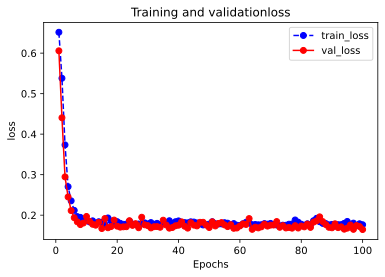

In [63]:
plot_metric(dhistory = dhistory, metric = 'loss')

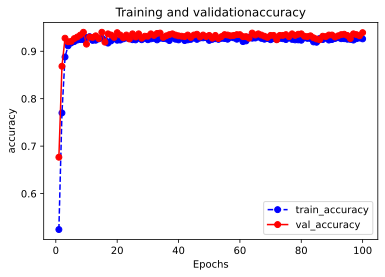

In [64]:
plot_metric(dhistory = dhistory, metric = 'accuracy')

In [65]:
model.evaluate(dl_valid)

{'val_loss': 0.16453858154515424, 'val_accuracy': 0.9391666650772095}

#### 1.5 使用模型

In [66]:
model.predict(dl_valid)[0:10]

tensor([[2.5628e-02],
        [8.3687e-01],
        [9.9843e-01],
        [1.8253e-02],
        [8.0824e-04],
        [1.3085e-02],
        [9.9791e-01],
        [2.5709e-01],
        [3.0081e-01],
        [1.3379e-03]])